# Make hand made training image masks binary

Make hand made training images to binary.

In hand made masks roots are painted as red.

### Import libraries

In [2]:
from matplotlib import pyplot as plt
from skimage import exposure, measure
import numpy as np
import cv2
import glob

### Remove isolated pixels that have size less than thershold

In [3]:
def remove_isolated_pixels(thresh, min_size):
    # Perform a connected component analysis on the thresholded
    # image and remove components that have size less than thershold
    labels = measure.label(thresh, connectivity=2, background=0)
    mask = np.zeros(thresh.shape, dtype="uint8")
    # loop over the unique components
    for label in np.unique(labels):
        # if this is the background label, ignore it
        if label == 0:
            continue
        # otherwise, construct the label mask and count the
        # number of pixels 
        labelMask = np.zeros(thresh.shape, dtype="uint8")
        labelMask[labels == label] = 255
        numPixels = cv2.countNonZero(labelMask)
        # if the number of pixels in the component is sufficiently
        # large, then add it to our mask of "large blobs"
        if (numPixels > min_size):
            mask = cv2.add(mask, labelMask)
            
    # Return cleaned mask
    return mask

### Print light and edge areas as binary masks

Expects read image to end as "-mask_raw.jpg" and saves new image with end "-mask.jpg"


In [6]:
# Counter
i = 1

# Define save path
save_path = "data/train_images_and_masks/"
    
# Read all files in folder with ending "-mask_raw.jpg"
for im_name in glob.glob("data/handmade_train_masks_raw/*-mask_raw.jpg"):
    # Read image to opencv
    im_color = cv2.imread(im_name, 1)
    # Filter color
    # Red roots (Color code order: G, B, R)
    im_bin = cv2.inRange(im_color, (0, 0, 220), (70, 70,255))
    
    # Threshold mask. Values less than threshold to 255. Picture has no values than threshold in last step.
    im_bin = cv2.threshold(im_bin, 250, 255, cv2.THRESH_BINARY)[1]
    
    # "Make areas fatter by 1 pixel (join roots where is tiny holes)
    #im_bin = cv2.dilate(im_bin, None, iterations=1)
    
    # Remove small noise pixels from mask (Min size setting needs adjusting!!!)
    #im_bin = remove_isolated_pixels(im_bin, min_size=100)
    
    # Give new image name
    save_name = im_name.split('-mask_raw.jpg')[0]+'-mask.jpg'
    
    # Change save path
    save_name = save_name.split("/")[-1]
    save_name = save_path+save_name
    
    # Save images
    cv2.imwrite(save_name, im_bin)
    
    # Print name and number
    print(i, ":", save_name)
    i=i+1

1 : data/train_images_and_masks/hydescan3_T001_L001_2020.08.03_033029_449_DYY-mask.jpg
2 : data/train_images_and_masks/hydescan1_T001_L001_2020.07.15_033029_362_DYY-mask.jpg
3 : data/train_images_and_masks/hydescan1_T001_L001_2020.05.01_033029_287_DYY-mask.jpg
4 : data/train_images_and_masks/hydescan1_T001_L001_2020.05.13_033029_299_DYY-mask.jpg
5 : data/train_images_and_masks/hydescan2_T001_L001_2019.09.27_033029_320_DYY-mask.jpg
6 : data/train_images_and_masks/hydescan1_T001_L001_2020.06.27_033029_344_DYY-mask.jpg
7 : data/train_images_and_masks/hydescan1_T001_L001_2020.05.25_033029_311_DYY-mask.jpg
8 : data/train_images_and_masks/hydescan1_T001_L001_2020.06.02_033029_319_DYY-mask.jpg
9 : data/train_images_and_masks/hydescan3_T001_L001_2020.07.01_033029_416_DYY-mask.jpg
10 : data/train_images_and_masks/hydescan2_T001_L001_2020.06.02_033029_350_DYY-mask.jpg
11 : data/train_images_and_masks/hydescan2_T001_L001_2020.07.08_033029_386_DYY-mask.jpg
12 : data/train_images_and_masks/hydescan

### Show original image as grayscale

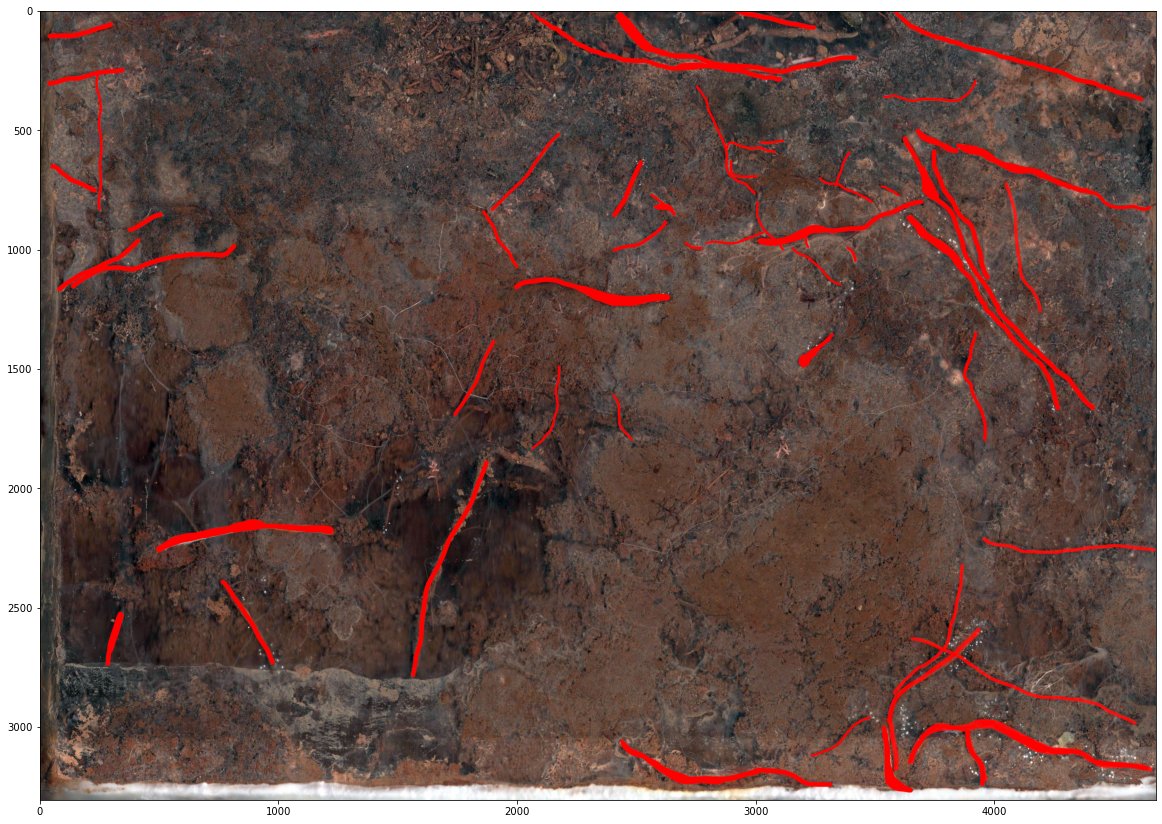

In [7]:
# BRG to RGB
im_color = cv2.cvtColor(im_color, cv2.COLOR_BGR2RGB)

# Show image
plt.figure(figsize=(20, 20))
plt.imshow(np.abs(im_color), cmap = 'gray')
plt.show()

### Show result image

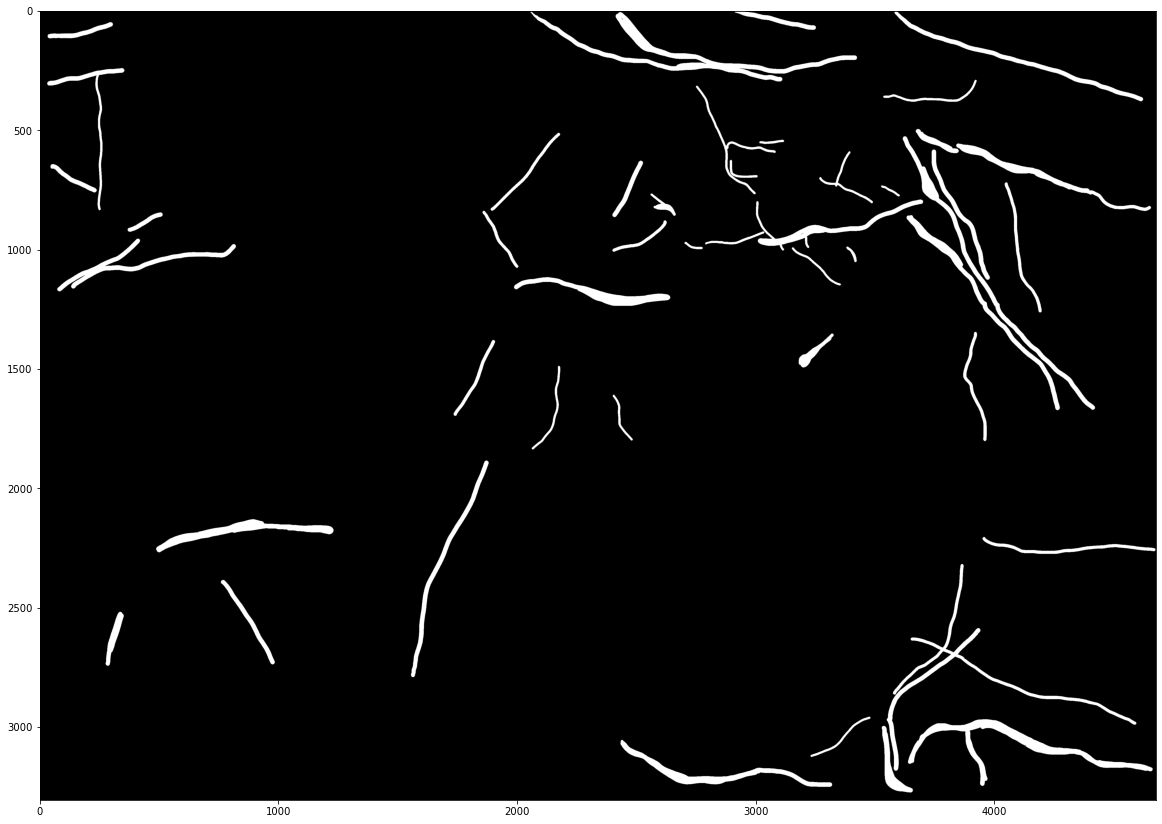

In [9]:
plt.figure(figsize=(20, 20))
plt.imshow(np.abs(im_bin), cmap = 'gray')
plt.show()